In [1]:
#Raw data displayed
#plots created by Robin Uhrich
#modified by Lilli DIederichs

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os

# sys.path.append("/".join(sys.path[0].split("/")[:-1]))

from studies.utils.dwd_data import DWD_Dataset, Feature

import polars as pl
import pandas as pd
import datetime
import matplotlib


#Tueplots
from scipy.stats import linregress
import matplotlib.colors as mcolors
from tueplots import cycler, markers,figsizes, fonts
from tueplots.constants import markers as marker_constants
from tueplots.constants.color import palettes

#Legend
import matplotlib.lines as mlines

In [14]:
#Plotting Params

plt.rcParams.update(figsizes.icml2022_full())
plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
from studies.utils.setup_pyplot import (
    SIDEEFFECTS_setup_tueplot,
    SIDEEFFECTS_choose_color_palette,
)
#Font
SIDEEFFECTS_setup_tueplot()

tue_plot_colors = palettes.tue_plot
FIG_SAVE_BASE_PATH = '../docs/report/fig/'

In [12]:
#Import dataset
dataset_model_1 = DWD_Dataset(
    source_path="../data/dwd",
    model=1,
    feature=Feature.PRECIPITATION
)
dataset_model_2 = DWD_Dataset(
    source_path="../data/dwd",
    model=2,
    feature=Feature.PRECIPITATION
)

2023-12-21 00:00:00 2023-12-28 21:00:00


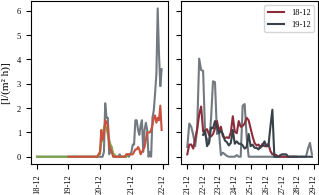

In [22]:
#Raw data
STATION_ID = 5688
formatter = matplotlib.dates.DateFormatter('%d-%m')

forecast1 = dataset_model_1.get_merge(station_id=STATION_ID).copy()
forecast2 = dataset_model_2.get_merge(station_id=STATION_ID).copy()


forecast1["call_time"] = forecast1["call_time"].dt.normalize()
forecast2["call_time"] = forecast2["call_time"].dt.normalize()
#Try to set x lim to 3 call times around extreme weather 
# num call times
num_call_times = 2

fig, axs = plt.subplots(ncols=2, sharey=True)
call_times = sorted(forecast1["call_time"].unique())
for idx, call_time in enumerate(call_times[10:10+num_call_times]):
    sub_df_forecast = forecast1[(forecast1["call_time"] == call_time)].sort_values(by="time")
    t = sub_df_forecast["time"]
    values = sub_df_forecast["precipitation_forecast"]

    axs[0].plot(
        t,
        values,
        label=call_time.strftime('%d-%m'),
        color=tue_plot_colors[idx+5]  # Use the color from the list
    )
    sub_df_forecast = forecast2[(forecast2["call_time"] == call_time)].sort_values(by="time")
    t = sub_df_forecast["time"]
    values = sub_df_forecast["precipitation_forecast"] / 3
    axs[1].plot(t, values, label=call_time.strftime('%d-%m'))

# add historical context
# model 1
sub_df = forecast1[
    forecast1["call_time"].isin(call_times[10:10+num_call_times])
    & (forecast1["station_id"] == STATION_ID)
]
min_time = min(sub_df["time"])
max_time = max(sub_df["time"])
real = forecast1[
    (forecast1["time"] <= max_time)
    & (forecast1["time"].values >= min_time)
    & (forecast1["station_id"] == STATION_ID)
].sort_values(by="time")
axs[0].plot(real["time"], real["precipitation_real"], zorder=0, c=tue_plot_colors[1], alpha=0.7)
# model 2
sub_df = forecast2[
    forecast2["call_time"].isin(call_times[10:10+num_call_times])
    & (forecast2["station_id"] == STATION_ID)
]
min_time = min(sub_df["time"])
max_time = max(sub_df["time"])
print(min_time, max_time)
real = forecast2[
    (forecast2["time"] <= max_time)
    & (forecast2["time"].values >= min_time)
    & (forecast2["station_id"] == STATION_ID)
].sort_values(by="time")
axs[1].plot(real["time"], real["precipitation_real"] / 3, zorder=0, c=tue_plot_colors[1], alpha=0.7)


axs[0].set_xticks(axs[0].get_xticks()[::2], axs[0].get_xticklabels()[::2], rotation=90)
axs[1].set_xticks(axs[1].get_xticks(), axs[1].get_xticklabels(), rotation=90)


axs[0].set_ylabel("[l/(m² h)]", rotation = 90)


axs[1].legend()

#fig.suptitle("Precipitation in December \n Dachsberg-Wolpadingen")


#Axis Formatter 
# ax.legend()
axs[0].xaxis.set_major_formatter(formatter)
axs[1].xaxis.set_major_formatter(formatter)




# Add the legend to the first subplot (axs[0])
plt.legend()

#plt.savefig(os.path.join(FIG_SAVE_BASE_PATH,"fig_forecast_dec_diff_call_times.pdf"))

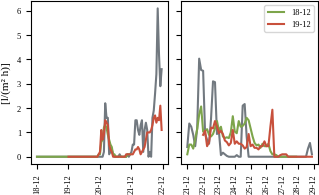

In [23]:
STATION_ID = 5688
formatter = matplotlib.dates.DateFormatter('%d-%m')

forecast1 = dataset_model_1.get_merge(station_id=STATION_ID).copy()
forecast2 = dataset_model_2.get_merge(station_id=STATION_ID).copy()

forecast1["call_time"] = forecast1["call_time"].dt.normalize()
forecast2["call_time"] = forecast2["call_time"].dt.normalize()

#Try to set x lim to 3 call times around extreme weather 
# num call times
num_call_times = 2

fig, axs = plt.subplots(ncols=2, sharey=True)
call_times = sorted(forecast1["call_time"].unique())

for idx, call_time in enumerate(call_times[10:10+num_call_times]):
    sub_df_forecast = forecast1[(forecast1["call_time"] == call_time)].sort_values(by="time")
    t = sub_df_forecast["time"]
    values = sub_df_forecast["precipitation_forecast"]

    axs[0].plot(
        t,
        values,
        label=call_time.strftime('%d-%m'),
        color=tue_plot_colors[idx+5]  # Use the color from the list
    )

    sub_df_forecast = forecast2[(forecast2["call_time"] == call_time)].sort_values(by="time")
    t = sub_df_forecast["time"]
    values = sub_df_forecast["precipitation_forecast"] / 3

    axs[1].plot(
        t,
        values,
        label=call_time.strftime('%d-%m'),
        color=tue_plot_colors[idx+5]  # Use the same color as in axs[0]
    )

# add historical context
# model 1
sub_df = forecast1[
    forecast1["call_time"].isin(call_times[10:10+num_call_times])
    & (forecast1["station_id"] == STATION_ID)
]
min_time = min(sub_df["time"])
max_time = max(sub_df["time"])
real = forecast1[
    (forecast1["time"] <= max_time)
    & (forecast1["time"].values >= min_time)
    & (forecast1["station_id"] == STATION_ID)
].sort_values(by="time")
axs[0].plot(real["time"], real["precipitation_real"], zorder=0, c=tue_plot_colors[1], alpha=0.7)

# model 2
sub_df = forecast2[
    forecast2["call_time"].isin(call_times[10:10+num_call_times])
    & (forecast2["station_id"] == STATION_ID)
]
min_time = min(sub_df["time"])
max_time = max(sub_df["time"])
real = forecast2[
    (forecast2["time"] <= max_time)
    & (forecast2["time"].values >= min_time)
    & (forecast2["station_id"] == STATION_ID)
].sort_values(by="time")
axs[1].plot(real["time"], real["precipitation_real"] / 3, zorder=0, c=tue_plot_colors[1], alpha=0.7)

axs[0].set_xticks(axs[0].get_xticks()[::2], axs[0].get_xticklabels()[::2], rotation=90)
axs[1].set_xticks(axs[1].get_xticks(), axs[1].get_xticklabels(), rotation=90)

axs[0].set_ylabel("[l/(m² h)]", rotation = 90)

axs[1].legend()

axs[0].xaxis.set_major_formatter(formatter)
axs[1].xaxis.set_major_formatter(formatter)

# Add the legend to the first subplot (axs[0])
plt.legend()

plt.savefig(os.path.join(FIG_SAVE_BASE_PATH, "fig_forecast_dec_diff_call_times.pdf"))


                                  call_time  station_id  \
time                                                      
2023-12-08 00:00:00 2023-12-08 00:08:04.500       257.0   
2023-12-08 01:00:00 2023-12-08 00:08:04.500       257.0   
2023-12-08 02:00:00 2023-12-08 00:08:04.500       257.0   
2023-12-08 03:00:00 2023-12-08 00:08:04.500       257.0   
2023-12-08 04:00:00 2023-12-08 00:08:04.500       257.0   
...                                     ...         ...   
2024-01-13 19:00:00 2024-01-11 00:10:01.000       257.0   
2024-01-13 20:00:00 2024-01-11 00:10:01.000       257.0   
2024-01-13 21:00:00 2024-01-11 00:10:01.000       257.0   
2024-01-13 22:00:00 2024-01-11 00:10:01.000       257.0   
2024-01-13 23:00:00 2024-01-11 00:10:01.000       257.0   

                     precipitation_forecast  precipitation_real  \
time                                                              
2023-12-08 00:00:00                     0.0                 0.0   
2023-12-08 01:00:00            

/tmp/ipykernel_17861/1184196260.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/tmp/ipykernel_17861/1184196260.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)


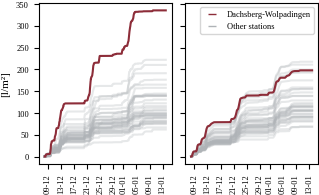

In [24]:
#CumSum
historical = dataset_model_1.get_merge()
historical = historical.sort_values(by="time")
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

for idx, (index, group) in enumerate(historical.groupby("station_id")):
    c = tue_plot_colors[0] if index == 5688 else tue_plot_colors[4]
    alpha = 1 if index == 5688 else 0.3
    zorder = 0 if index != 5688 else 1
    label = index if index == 5688 else "other" if idx == 0 else ""
    
    temp_mean = group.groupby("time").max()
    
    ax1.plot(
        temp_mean.index,
        temp_mean["precipitation_real"].values.cumsum(),
        label=label,
        c=c,
        zorder=zorder,
        alpha=alpha,
    )

    temp_max = group.groupby("time").mean()
    ax2.plot(
        temp_max.index,
        temp_max["precipitation_forecast"].values.cumsum(),
        label=label,
        c=c,
        zorder=zorder,
        alpha=alpha,
    )

    
    print(group.groupby("time").mean())


# ax.legend()
formatter = matplotlib.dates.DateFormatter('%d-%m')
ax1.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_formatter(formatter)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("[l/m²]")

#Create Legend
extreme_station = mlines.Line2D([], [], color=tue_plot_colors[0], marker='_', ls='', label='Dachsberg-Wolpadingen')
all_the_other_stations = mlines.Line2D([], [], color=tue_plot_colors[4], marker='_', ls='', label='Other stations')
# etc etc
plt.legend(handles=[extreme_station, all_the_other_stations])
plt.savefig(os.path.join(FIG_SAVE_BASE_PATH,'fig_cumsum.pdf'))